In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings 
import seaborn as sns

In [2]:
df = pd.read_csv('Call.csv')

In [3]:
df.head()

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call_Call_duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,NaN,10/5/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,NaN,10/4/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,NaN,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA


In [4]:
df.csat_score

0        7.0
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
32936    NaN
32937    NaN
32938    NaN
32939    8.0
32940    NaN
Name: csat_score, Length: 32941, dtype: float64

In [5]:

df.csat_score.median()

5.0

In [6]:
#Data Preprocessing filling in nan with median values
df.csat_score = df.csat_score.fillna(df.csat_score.median())
df.head()

,id,customer_name,sentiment,csat_score,call_timestamp,reason,city,state,channel,response_time,call_Call_duration in minutes,call_center
0,DKK-57076809-w-055481-fU,Analise Gairdner,Neutral,7.0,10/29/2020,Billing Question,Detroit,Michigan,Call-Center,Within SLA,17,Los Angeles/CA
1,QGK-72219678-w-102139-KY,Crichton Kidsley,Very Positive,5.0,10/5/2020,Service Outage,Spartanburg,South Carolina,Chatbot,Within SLA,23,Baltimore/MD
2,GYJ-30025932-A-023015-LD,Averill Brundrett,Negative,5.0,10/4/2020,Billing Question,Gainesville,Florida,Call-Center,Above SLA,45,Los Angeles/CA
3,ZJI-96807559-i-620008-m7,Noreen Lafflina,Very Negative,1.0,10/17/2020,Billing Question,Portland,Oregon,Chatbot,Within SLA,12,Los Angeles/CA
4,DDU-69451719-O-176482-Fm,Toma Van der Beken,Very Positive,5.0,10/17/2020,Payments,Fort Wayne,Indiana,Call-Center,Within SLA,23,Los Angeles/CA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32941 entries, 0 to 32940
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             32941 non-null  object 
 1   customer_name                  32941 non-null  object 
 2   sentiment                      32941 non-null  object 
 3   csat_score                     32941 non-null  float64
 4   call_timestamp                 32941 non-null  object 
 5   reason                         32941 non-null  object 
 6   city                           32941 non-null  object 
 7   state                          32941 non-null  object 
 8   channel                        32941 non-null  object 
 9   response_time                  32941 non-null  object 
 10  call_Call_duration in minutes  32941 non-null  int64  
 11  call_center                    32941 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usa

In [8]:
df.columns

Index(['id', 'customer_name', 'sentiment', 'csat_score', 'call_timestamp',
       'reason', 'city', 'state', 'channel', 'response_time',
       'call_Call_duration in minutes', 'call_center'],
      dtype='object')

In [9]:
#Checking the stats
df.describe()

,csat_score,call_Call_duration in minutes
count,32941.000000,32941.000000
mean,5.204305,25.021159
std,1.471207,11.816218
min,1.000000,5.000000
25%,5.000000,15.000000
50%,5.000000,25.000000
75%,5.000000,35.000000
max,10.000000,45.000000


In [10]:
df.shape

(32941, 12)

In [11]:
df.isnull().sum()

id                               0
customer_name                    0
sentiment                        0
csat_score                       0
call_timestamp                   0
reason                           0
city                             0
state                            0
channel                          0
response_time                    0
call_Call_duration in minutes    0
call_center                      0
dtype: int64

# * The major reason for reaching out to the customer service team
*Billing questions were the major reasons

In [50]:
df_1= df.pivot_table(index='reason', columns='sentiment', aggfunc='size')
df_1.style.background_gradient('Greens')

sentiment,Negative,Neutral,Positive,Very Negative,Very Positive
reason,,,,,
Billing Question,7868,6232,2775,4300,2287
Payments,1593,1238,552,897,469
Service Outage,1602,1284,601,829,414


# Does Response Time Influnce the Customers satisfaction Score?

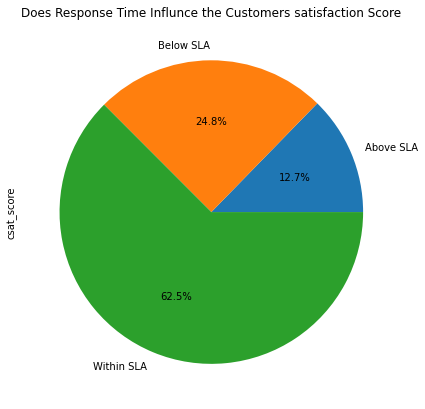

In [14]:
#How many subscriber per level?
plt.figure(figsize = (6.8,7.3))

#df.groupby('level')['num_subscribers'].sum().plot(kind='pie', autopct='%1.1f%%')
#plt.show()
df.groupby('response_time')['csat_score'].sum().plot(kind='pie', autopct='%1.1f%%', title='Does Response Time Influnce the Customers satisfaction Score')
plt.show()

# Does the Customer's sentiment influence the customer's satisfacton score ?*

* From the csat score, it shows that customers with Nagative Sentiment gave a higher rating than those with [Positive] and [Very Positive] Sentiment.
* Probably the reason for the high rating in the neagtive sentiment was due to the effectivness of the Customer Service team

In [15]:
#From the csat score, it shows that customers with Nagative Sentiment gave a higher rating than those with 
#[Positive] and [Very Positive] Sentiment.

#Probably the reason for the high rating in the neagtive sentiment was due to the effectivness of the Customer Service team
sentiment_score_df = pd.DataFrame(df.groupby('sentiment').sum()['csat_score'])
sentiment_score_df.sort_values ('csat_score', ascending=False) 

,csat_score
sentiment,
Negative,53386.0
Neutral,48578.0
Very Negative,24343.0
Positive,24106.0
Very Positive,21022.0


In [16]:
#From the csat score, it shows that customers with Nagative Sentiment gave a higher rating than those with 
#[Positive] and [Very Positive] Sentiment.

#Probably the reason for the high rating in the neagtive sentiment was due to the effectivness of the Customer Service team
sentiment_score_df = pd.DataFrame(df.groupby('sentiment').sum()['csat_score'])
sentiment_score_df.sort_values ('csat_score', ascending=False) 

,csat_score
sentiment,
Negative,53386.0
Neutral,48578.0
Very Negative,24343.0
Positive,24106.0
Very Positive,21022.0


[]

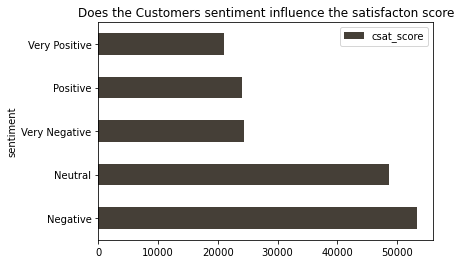

In [18]:
sentiment_score_df = pd.DataFrame(df.groupby('sentiment').sum()['csat_score'])
sentiment_score_df.sort_values ('csat_score', ascending=False) .plot(kind='barh', title='Does the Customers sentiment influence the satisfacton score', color='#453f37')
plt.plot()

# Does Sentiments Trigger call Duration?


In [19]:
#Looking at the progression below, it shows that customers with [Negative] 
#sentiment had a higher call duration than people with [postive] and [very postive] sentiment.
sentiment_call_df = pd.DataFrame(df.groupby('sentiment').sum()['call_Call_duration in minutes'])
sentiment_call_df.sort_values ('call_Call_duration in minutes', ascending=False)

,call_Call_duration in minutes
sentiment,
Negative,279471
Neutral,218323
Very Negative,150283
Positive,97658
Very Positive,78487


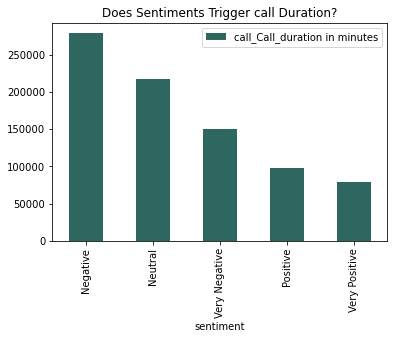

In [20]:
sentiment_call_df = pd.DataFrame(df.groupby('sentiment').sum()['call_Call_duration in minutes'])
sentiment_call_df.sort_values ('call_Call_duration in minutes', ascending=False).plot(kind='bar', title='Does Sentiments Trigger call Duration?', color='#2e6660')
plt.show()

# Location of Contact centers that received the most negative sentiment from customers 
* Los Angeles /CA was the Highest

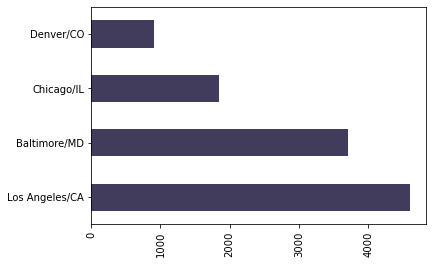

In [21]:
#Location of Contact centers that received the most negative sentiment from customers 
df[df['sentiment']== 'Negative'].call_center.value_counts().plot(kind='barh', color='#413b5c')
plt.xticks(rotation='vertical', size=10)
plt.show()

#  Channels through which Customers reached out to the Contact center Team*
* Calls from the Call-Centre had the highest Traffic
* The least was the web

In [22]:
df['channel'].value_counts(normalize='True')

Call-Center    0.322971
Chatbot        0.250630
Email          0.226769
Web            0.199630
Name: channel, dtype: float64

# Does Duration of calls have an effect on Customer Staisfaction Rating

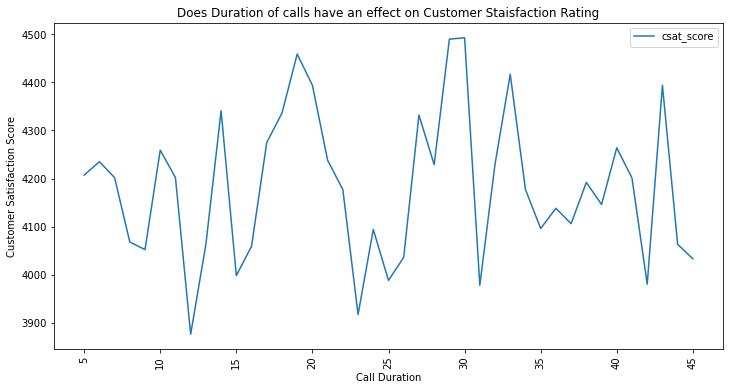

In [26]:
## Does Duration of calls have an effect on Customer Staisfaction Survey
duration_call_df =pd.DataFrame(df.groupby('call_Call_duration in minutes').sum()['csat_score']).plot(figsize = [12,6])
plt.xlabel('Call Duration')
plt.ylabel('Customer Satisfaction Score')
plt.title('Does Duration of calls have an effect on Customer Staisfaction Rating')
plt.xticks(rotation='vertical', size=10)
plt.show()


In [27]:
pd.DataFrame(df.groupby('call_Call_duration in minutes').sum()['csat_score']).head()

,csat_score
call_Call_duration in minutes,
5,4207.0
6,4235.0
7,4202.0
8,4068.0
9,4052.0


# filter that dataframe and create seperate tables of customers that that experessed different sentiements  

In [30]:
#Customer #Customer Who had negative Sentiments
Negative =df[(df.sentiment== 'Negative')]

In [32]:
Negative=Negative[['customer_name','sentiment','reason']]

In [33]:
Negative.head()

,customer_name,sentiment,reason
2,Averill Brundrett,Negative,Billing Question
10,Ella Cristoforo,Negative,Billing Question
11,Aubrey Surcombe,Negative,Billing Question
15,Dani Stanfield,Negative,Billing Question
16,Margarette Jehaes,Negative,Billing Question


In [34]:
#Customer Who had a Neutral Sentiments
Neutral =df[(df.sentiment== 'Neutral')]

In [35]:
Neutral=Neutral[['customer_name','sentiment','reason']]

In [36]:
Neutral.head()

,customer_name,sentiment,reason
0,Analise Gairdner,Neutral,Billing Question
5,Kaylyn Emlen,Neutral,Billing Question
6,Phillipe Bowring,Neutral,Billing Question
9,Port Inggall,Neutral,Billing Question
17,Noni Greatrakes,Neutral,Billing Question


In [37]:
#Customer Who had a Very Negative Sentiments
Very_Negative =df[(df.sentiment== 'Very Negative')]

In [38]:
Very_Negative=Very_Negative[['customer_name','sentiment','reason']]

In [39]:
Very_Negative.head()

,customer_name,sentiment,reason
3,Noreen Lafflina,Very Negative,Billing Question
8,Oran Lifsey,Very Negative,Billing Question
14,Odell Cathesyed,Very Negative,Payments
19,Tammie Bettinson,Very Negative,Payments
22,Sophie Kleinerman,Very Negative,Billing Question


In [40]:
#Customer Who had a Positive Sentiments
Positive =df[(df.sentiment== 'Positive')]

In [41]:
Positive=Positive[['customer_name','sentiment','reason']]

In [42]:
Positive.head()

,customer_name,sentiment,reason
7,Krysta de Tocqueville,Positive,Billing Question
13,Melesa Ricardot,Positive,Billing Question
25,Bethina Fazzioli,Positive,Billing Question
34,Quinton Marchelli,Positive,Payments
47,Luca Castel,Positive,Payments


In [43]:

# #Customer Who had a Very Positive Sentiments
Very_Positive =df[(df.sentiment== 'Very Positive')]

In [44]:
Very_Positive=Very_Positive[['customer_name','sentiment','reason']]

In [45]:
Very_Positive.head()

,customer_name,sentiment,reason
1,Crichton Kidsley,Very Positive,Service Outage
4,Toma Van der Beken,Very Positive,Payments
12,Nicolle Fareweather,Very Positive,Billing Question
27,Anissa Kinrade,Very Positive,Payments
28,Bradly Dinkin,Very Positive,Billing Question
